In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
X_train_0 = train.drop(labels=['id', 'revenue'], axis=1)
y_train = train['revenue']
X_train_0.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


To check if numeric variables all may hold predictive potential:

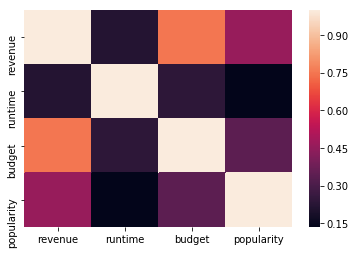

In [4]:
numerical_cols = ['revenue', 'runtime', 'budget', 'popularity']
corr_matrix = train[numerical_cols].corr()
sns.heatmap(corr_matrix)

I'll delete columns that are either useless or useless for me:

In [5]:
X_train_1 = X_train_0.drop(['homepage','imdb_id','overview','poster_path','tagline','title', 'original_title', 'crew'], axis=1)
X_train_1.describe(include=['object', 'bool', 'float64'])

,belongs_to_collection,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast
count,604,2993,3000,3000.000000,2844,2945,3000,2998.000000,2980,3000,2724,2987
unique,422,872,36,NaN,2383,321,2398,NaN,401,2,2648,2975
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",en,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 10183, 'name': 'independent film'}]",[]
freq,16,266,2575,NaN,51,1752,5,NaN,1817,2996,27,13
mean,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN


Some missing data, but that can be encoded to zeroes when one-hot-autoencoding.
Missing values for runtime, however, I think I can just delete.

In [6]:
X_train_2 = X_train_1[X_train_1['runtime']>10]
X_train_2.shape

(2986, 13)

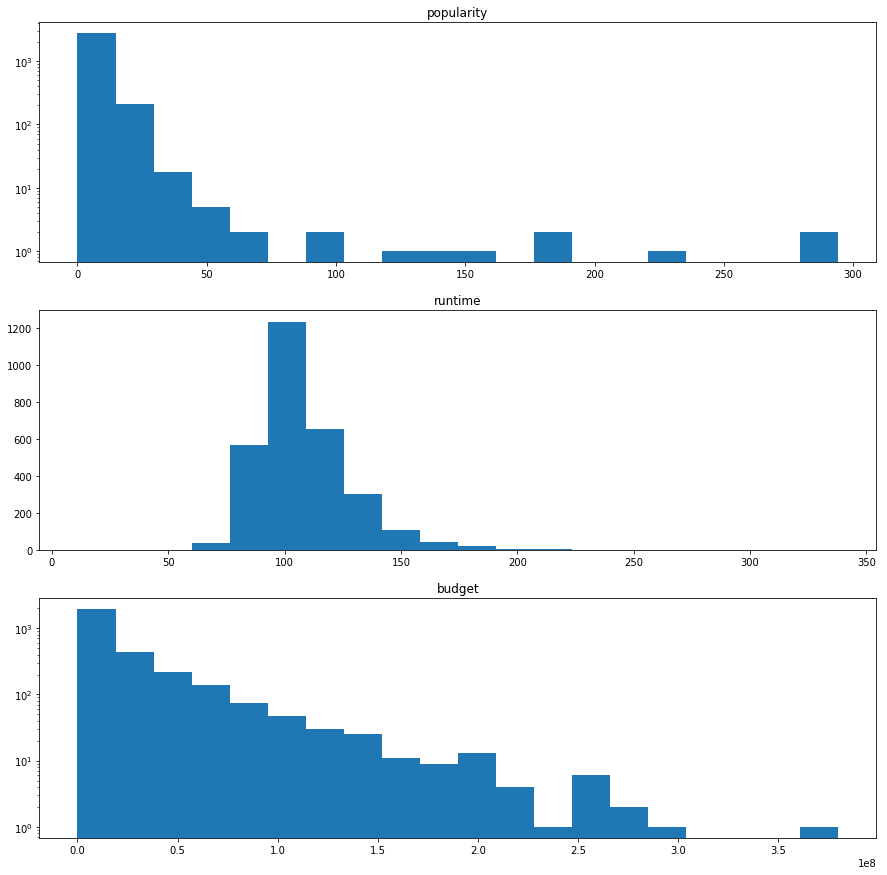

In [7]:
plots = plt.figure(figsize=(15, 15))
plots.add_subplot(3,1,1, title='popularity')
plt.hist(X_train_2['popularity'], log=True, bins = 20)
plots.add_subplot(3,1,2, title='runtime')
plt.hist(X_train_2['runtime'], log=False, bins = 20)
plots.add_subplot(3,1,3, title='budget')
plt.hist(X_train_2['budget'], log=True, bins = 20)
plt.show()

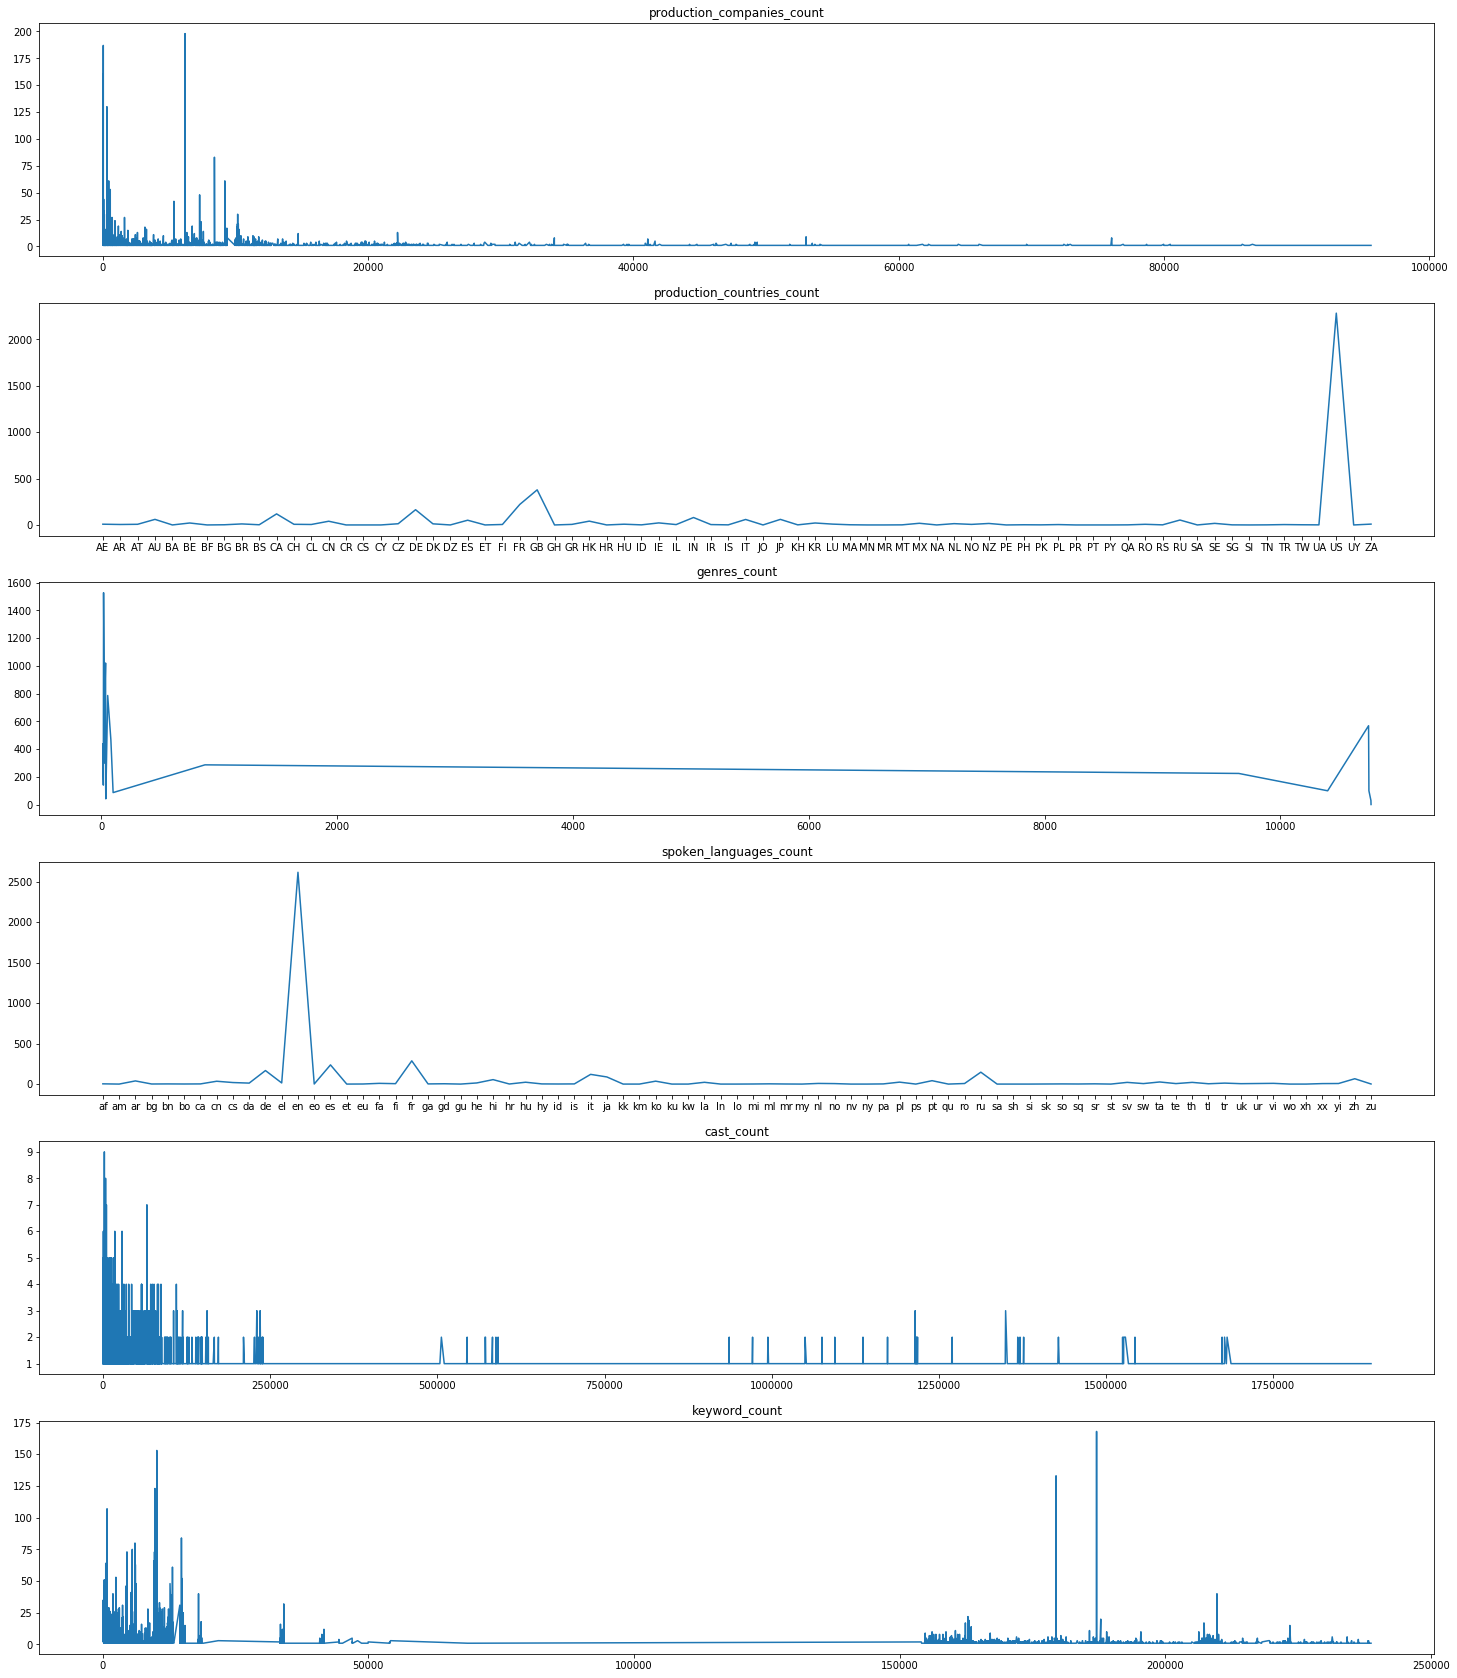

In [8]:
import json
res_production_companies=[]
res_production_countries=[]
res_genres=[]
res_spoken_languages=[]
res_cast=[]
res_keywords=[]

for entry in X_train_2['production_companies']:
    try:
        new = json.loads(entry.replace('\'','\"')) # I don't know why they got converted to strings 
        for n in new:
             res_production_companies+=[n['id']]
    except:
        continue

for entry in X_train_2['production_countries']:
    try:
        new = json.loads(entry.replace('\'','\"'))
        for n in new:
             res_production_countries+=[n['iso_3166_1']] # this made it simpler to just copy code 5 times rather than coding a workaround
    except:
        continue

for entry in X_train_2['genres']:
    try:
        new = json.loads(entry.replace('\'','\"')) 
        for n in new:
             res_genres+=[n['id']]
    except:
        continue

for entry in X_train_2['spoken_languages']:
    try:
        new = json.loads(entry.replace('\'','\"'))
        for n in new:
             res_spoken_languages+=[n['iso_639_1']] 
    except:
        continue

for entry in X_train_2['cast']:
    try:
        new = json.loads(entry.replace('\'','\"'))
        for n in new:
             res_cast+=[n['id']]
    except:
        continue
        
for entry in X_train_2['Keywords']:
    try:
        new = json.loads(entry.replace('\'','\"'))
        for n in new:
            res_keywords+=[n['id']]
        
    except:
        continue
        
res_production_companies=np.array(res_production_companies)
res_production_countries=np.array(res_production_countries)
res_genres=np.array(res_genres)
res_spoken_languages=np.array(res_spoken_languages)
res_cast=np.array(res_cast)
res_keywords=np.array(res_keywords)


plots = plt.figure(figsize=(25, 30))




a_production_companies, b_production_companies = np.unique(res_production_companies, return_counts  = True)
a_production_countries, b_production_countries = np.unique(res_production_countries, return_counts  = True)
a_genres, b_genres = np.unique(res_genres, return_counts  = True)
a_spoken_languages, b_spoken_languages = np.unique(res_spoken_languages, return_counts  = True)
a_cast, b_cast = np.unique(res_cast, return_counts  = True)
a_keywords, b_keywords = np.unique(res_keywords, return_counts  = True)


plots.add_subplot(6,1,1, title = 'production_companies_count')
plt.plot(a_production_companies,b_production_companies)
plots.add_subplot(6,1,2, title = 'production_countries_count')
plt.plot(a_production_countries,b_production_countries)
plots.add_subplot(6,1,3, title = 'genres_count')
plt.plot(a_genres,b_genres)
plots.add_subplot(6,1,4, title = 'spoken_languages_count')
plt.plot(a_spoken_languages,b_spoken_languages)
plots.add_subplot(6,1,5, title = 'cast_count')
plt.plot(a_cast,b_cast)
plots.add_subplot(6,1,6, title = 'keyword_count')
plt.plot(a_keywords,b_keywords)

plt.show()


Genre ids seem oddly assigned.

Let's see how picking a few most common companies will perform:

7830  - this is how many (non-unique) companies are listed as some films producers


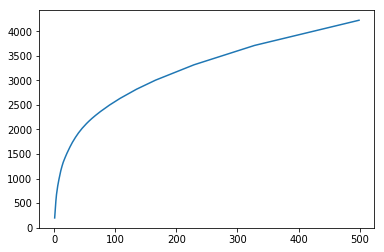

In [9]:
b2 = np.msort(b_production_companies)
#b2 = np.msort(b_production_countries)
#b2 = np.msort(b_genres)
#b2 = np.msort(b_spoken_languages)
#b2 = np.msort(b_keywords)
print(b2.sum(), ' - this is how many (non-unique) companies are listed as some films producers')
ns_taken = []
ocurrences_of_n_taken = []
for k in range(1, 500):
    ns_taken+=[k]
    ocurrences_of_n_taken += [b2[-k:].sum()]
plt.plot(ns_taken, ocurrences_of_n_taken)
plt.show()

So if I encoded 10 most common companies that would preserve ~1/8th of the data about companies.

3964


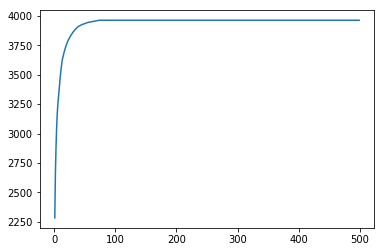

In [10]:
#b2 = np.msort(b_production_companies)
b2 = np.msort(b_production_countries)
#b2 = np.msort(b_genres)
#b2 = np.msort(b_spoken_languages)
#b2 = np.msort(b_keywords)
print(b2.sum())
ns_taken = []
ocurrences_of_n_taken = []
for k in range(1, 500):
    ns_taken+=[k]
    ocurrences_of_n_taken += [b2[-k:].sum()]
plt.plot(ns_taken, ocurrences_of_n_taken)
plt.show()

7486


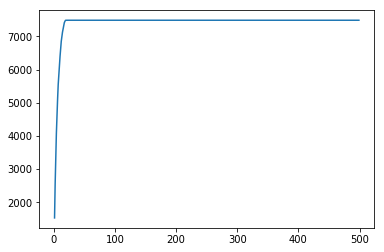

In [11]:
#b2 = np.msort(b_production_companies)
#b2 = np.msort(b_production_countries)
b2 = np.msort(b_genres)
#b2 = np.msort(b_spoken_languages)
#b2 = np.msort(b_keywords)
print(b2.sum())
ns_taken = []
ocurrences_of_n_taken = []
for k in range(1, 500):
    ns_taken+=[k]
    ocurrences_of_n_taken += [b2[-k:].sum()]
plt.plot(ns_taken, ocurrences_of_n_taken)
plt.show()

4345


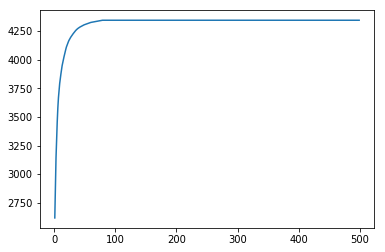

In [12]:
#b2 = np.msort(b_production_companies)
#b2 = np.msort(b_production_countries)
#b2 = np.msort(b_genres)
b2 = np.msort(b_spoken_languages)
#b2 = np.msort(b_keywords)
print(b2.sum())
ns_taken = []
ocurrences_of_n_taken = []
for k in range(1, 500):
    ns_taken+=[k]
    ocurrences_of_n_taken += [b2[-k:].sum()]
plt.plot(ns_taken, ocurrences_of_n_taken)
plt.show()

20622


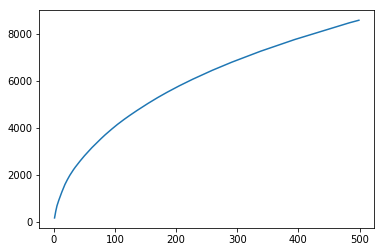

In [13]:
#b2 = np.msort(b_production_companies)
#b2 = np.msort(b_production_countries)
#b2 = np.msort(b_genres)
#b2 = np.msort(b_spoken_languages)
b2 = np.msort(b_keywords)
print(b2.sum())
ns_taken = []
ocurrences_of_n_taken = []
for k in range(1, 500):
    ns_taken+=[k]
    ocurrences_of_n_taken += [b2[-k:].sum()]
plt.plot(ns_taken, ocurrences_of_n_taken)
plt.show()

That's almost it for feature selection:

Countries, genres and languages should be decently encodeable, and as for the remaining two I will try:
* Adding encodings for n classes + other class for a few n, maybe put it in skopt.
* PCA